In [1]:
%load_ext watermark
%watermark -a 'cs224' -u -d -v -p numpy,pandas,matplotlib,sklearn,h5py,pytest

Author: cs224

Last updated: 2021-11-24

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.22.0

numpy     : 1.20.2
pandas    : 1.2.5
matplotlib: 3.3.4
sklearn   : 0.24.2
h5py      : 2.10.0
pytest    : 6.2.4



In [2]:
%matplotlib inline
import numpy as np, scipy, scipy.stats as stats, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import sklearn, sklearn.pipeline, sklearn.model_selection, sklearn.preprocessing, sklearn.linear_model

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=1000)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

SEED = 42
np.random.seed(SEED)

sns.set()

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [4]:
# import os,sys
# sys.path.append(os.path.realpath(os.path.abspath('') + '/../../lib'))

In [5]:
# %load_ext autoreload
# %autoreload 1
# %aimport somemodule

In [6]:
from IPython.display import display, HTML

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        if type(df) == np.ndarray:
            df = pd.DataFrame(df)
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline"')
    # print(html_str)
    display_html(html_str,raw=True)

CSS = """
.output {
    flex-direction: row;
}
"""

def display_graphs_side_by_side(*args):
    html_str='<table><tr>'
    for g in args:
        html_str += '<td>'
        html_str += g._repr_svg_()
        html_str += '</td>'
    html_str += '</tr></table>'
    display_html(html_str,raw=True)
    

display(HTML("<style>.container { width:70% !important; }</style>"))

In [7]:
# import importlib, logging
# importlib.reload(logging)
# logging.basicConfig(level=logging.DEBUG)
# logging.info('test')

In [8]:
# import warnings
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     warnings.filterwarnings("ignore", module='xxx_module_xxx')
#     warnings.filterwarnings('error', category=RuntimeWarning, module='empyrical.stats')


# with warnings.catch_warnings(record=True) as w:
#     # Cause all warnings to always be triggered.
#     warnings.simplefilter("always")

# warnings.filterwarnings('error, message='', category=Warning, module='', lineno=0, append=False)
# warnings.filterwarnings('error', module='pandas')
# warnings.filterwarnings('ignore', module='numba_scipy')
# warnings.filterwarnings('ignore', module='zipline.assets')

In [9]:
N_subjects = 1000

X = stats.norm(loc=0, scale=10).rvs(size=(N_subjects,1), random_state=np.random.RandomState(43))
X[:5,:]

array([[ 2.57399925],
       [-9.08481433],
       [-3.78503106],
       [-5.34915599],
       [ 8.58073346]])

In [10]:
a = 0.5
b = 1
y = a * X + b
y = y + stats.norm(loc=0, scale=0.5).rvs(size=(N_subjects,1), random_state=np.random.RandomState(44))
y[:5,:]

array([[ 1.91169227],
       [-2.8842285 ],
       [-0.26944552],
       [-2.47703586],
       [ 4.55629489]])

In [11]:
x_min = np.min(X)
x_max = np.max(X)
x_lin = np.linspace(x_min, x_max, 100)
y_lin = a * x_lin + b

In [12]:
lr_poly = sklearn.linear_model.LinearRegression()
lr_poly.fit(X, y)
lr_poly.intercept_, lr_poly.coef_

(array([0.99580863]), array([[0.49856981]]))

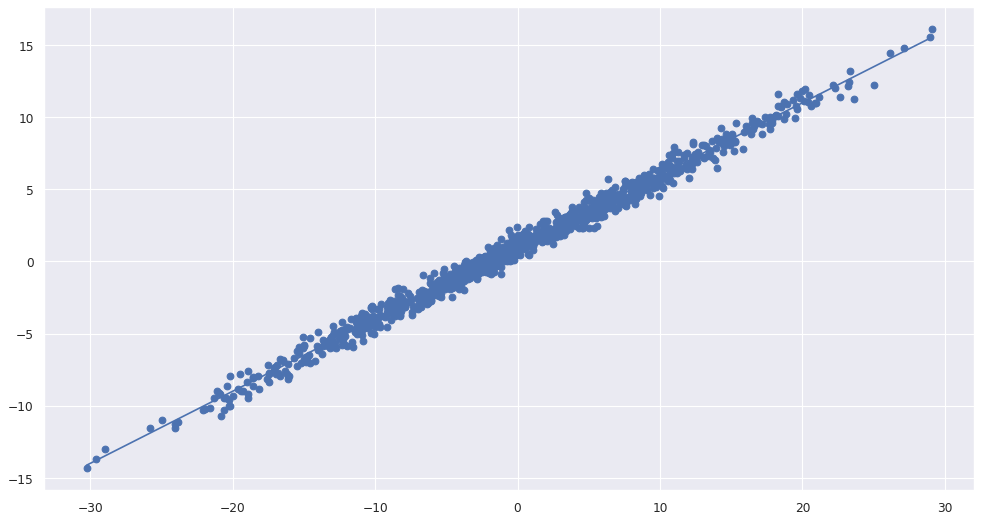

In [13]:
plt.figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.scatter(X,y)
ax.plot(x_lin,y_lin)

# LaTeX

Here is a `newcommand` (see in the source):
$$\newcommand{gpvec}[1]{{\bf #1}}$$
$$\newcommand{bfvec}[1]{{\pmb{#1}}}$$
$$p(f_*|x_*, X, y) = \mathcal{N}\left(\frac{1}{\sigma_n^2}\gpvec{x_*}^TA^{-1}X\gpvec{y},\; \gpvec{x_*}^TA^{-1}\bfvec{x_*}\right)$$
$$A=\frac{1}{\sigma_n^2}XX^T+\Sigma_p^{-1}$$

$\displaystyle
\begin{array}{rcl}
\text{μ} & \sim & a\\
\text{σ} & \sim & b\\
\end{array}
$

$$
\begin{align}
s_{t+1}=\begin{pmatrix}\beta_{t+1}\\\alpha_{t+1}\end{pmatrix}&=&\begin{pmatrix}\beta_t\\\alpha_t\end{pmatrix}+\eta_t&,\qquad& \eta_t \sim N(0, I_2\sigma_\eta^2)\\
y_t &=& Z_t\cdot s_t + \varepsilon_t = \begin{pmatrix}x_t&1\end{pmatrix}\cdot\begin{pmatrix}\beta_t\\\alpha_t\end{pmatrix} + \varepsilon_t =\beta_tx_t+\alpha_t \
&,\qquad&\varepsilon_t \sim N(0, \sigma_\varepsilon^2)
\end{align}
$$

Given a joint distribution:
$$\left[\begin{matrix}x\\ y\end{matrix}\right]\sim\mathcal{N}\left(
\left[\begin{matrix}\mu_x\\\mu_y\end{matrix}\right],
\left[\begin{matrix}A&C\\ C^T&B\end{matrix}\right]
\right)$$

We get the conditional distribution analytically as follows:

$$p(x\,|\, y)\sim\mathcal{N}(\mu_x+CB^{-1}(y-\mu_y), A-CB^{-1}C^T)$$

And as we set the mean to $0$ this reduces to:

$$p(x\,|\, y)\sim\mathcal{N}(CB^{-1}y, A-CB^{-1}C^T)$$

# SymPy

In [14]:
import sympy
sympy.init_printing()

In [15]:
def myfn(x):
    return (x+1)*(x-2)*(x-2.5)*(x-4)

symx = sympy.symbols('x')
sympy.expand(myfn(symx))

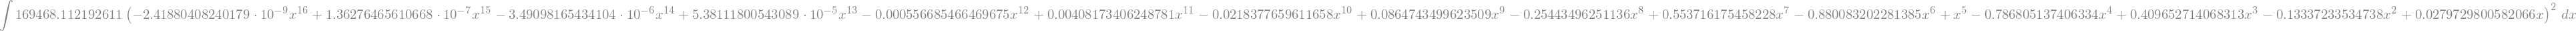

In [16]:
sx = sympy.symbols('x')
sfx = \
      -0.0000009957371   * sx**16 + \
       0.000056100257831 * sx**15 + \
      -0.0014371151322   * sx**14 + \
       0.022152182049259 * sx**13 + \
      -0.229167949577895 * sx**12 + \
       1.680307250977133 * sx**11 + \
      -8.98984498449258  * sx**10 + \
      35.59846747504916  * sx** 9 + \
    -104.74198119349185  * sx**8  + \
     227.94559624952703  * sx**7  + \
    -362.2994941897943   * sx**6  + \
     411.6650485438511   * sx**5  + \
    -323.9001750849299   * sx**4  + \
     168.63970442305256  * sx**3  + \
     -54.90472890518606  * sx**2  + \
      11.515498193577798 * sx
sfx2 = sfx**2
isfx2 = sympy.Integral(sfx2, sx)
isfx2

In [17]:
isfx2 = sympy.integrate(sfx2, (sx,0,6.56))
isfx2*sympy.pi

In [18]:
precision=50
sympy.N(isfx2*sympy.pi, precision)

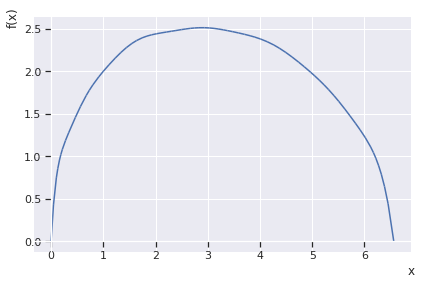

In [19]:
sympy.plotting.plot(sfx, (sx, 0, 6.56))

In [20]:
sa, sb, sc, sd = sympy.symbols(['a', 'b', 'c', 'd'])
se, sf, sg, sh = sympy.symbols('e f g h')

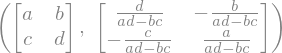

In [21]:
sm = sympy.Matrix([[sa, sb], [sc, sd]])
sm, sm.inv()

In [22]:
sympy.S("{:6.2f}".format(1.23))

In [23]:
solution = sympy.solveset(sympy.Eq(sx**2 - 1, 0), sx)
solution

In [24]:
list(solution)[0]

In [25]:
import statsmodels.api as sm, statsmodels.formula.api as smf
import datetime, dateutil

In [26]:
l = 300
x = np.arange(0, l)
y = 2.8 + x * 3.0 + X[:l,0]
dt = pd.to_datetime('2021-01-01')
d_ = dt + pd.Series(x).apply(lambda i: dateutil.relativedelta.relativedelta(days=i))
ldf = pd.DataFrame(index=d_)
ldf['x'] = x
ldf['y'] = y
ldf

,x,y
2021-01-01,0,5.373999
2021-01-02,1,-3.284814
2021-01-03,2,5.014969
2021-01-04,3,6.450844
2021-01-05,4,23.380733
...,...,...
2021-10-23,295,894.588123
2021-10-24,296,875.763121
2021-10-25,297,889.076043
2021-10-26,298,905.892752


In [27]:
def linreg(X,Y):
    X = sm.add_constant(X)
    model = sm.regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    return a, b, model

In [28]:
a, b, model = linreg(ldf.x, ldf.y)

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.103e+05
Date:                Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:27:13   Log-Likelihood:                -1109.2
No. Observations:                 300   AIC:                             2222.
Df Residuals:                     298   BIC:                             2230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6577      1.128      3.242      0.0

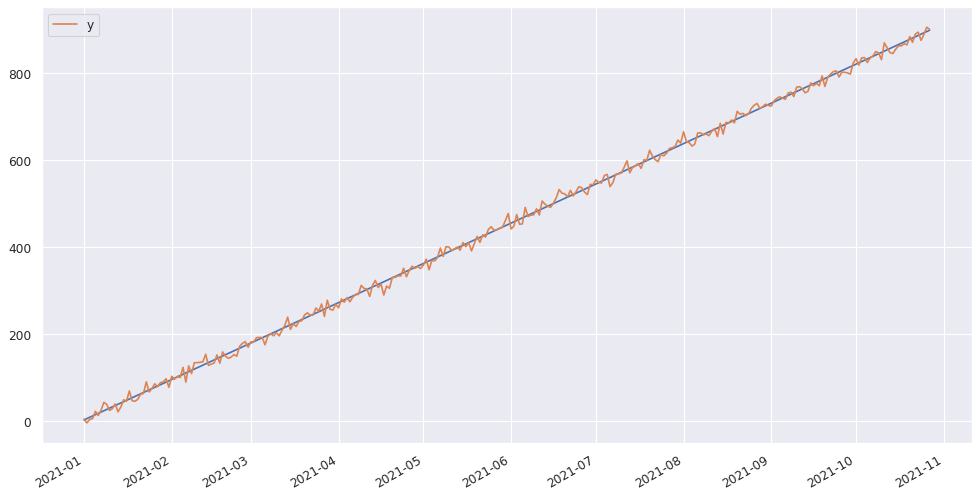

In [30]:
y_ = a + b * ldf.x
plt.figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
ax.plot(ldf.index, y_)
ldf[['y']].plot(ax=ax);

In [31]:
with pd.ExcelWriter("path_to_file.xlsx") as writer:
    ldf.to_excel(writer, sheet_name="Sheet1")

In [32]:
ldf_ = pd.read_excel("path_to_file.xlsx", sheet_name="Sheet1", index_col=[0])
ldf_

,x,y
2021-01-01,0,5.373999
2021-01-02,1,-3.284814
2021-01-03,2,5.014969
2021-01-04,3,6.450844
2021-01-05,4,23.380733
...,...,...
2021-10-23,295,894.588123
2021-10-24,296,875.763121
2021-10-25,297,889.076043
2021-10-26,298,905.892752


In [33]:
import os,re,tqdm

In [34]:
data_path = "/media/x99-ext4-media/cs/norgate-data/2021-11-07-snp500-data"
pattern = re.compile(r'([A-Za-z0-9.-]+)_(\d+).csv')
for f in tqdm.tqdm(os.listdir(data_path), desc='Loading data...'):
    m = re.match(pattern, f)
    if not m:
        continue
    symbol          = m.group(1)
    norgate_assetid = m.group(2)
    break

Loading data...:   0%|          | 0/1232 [00:00<?, ?it/s]


* https://stackoverflow.com/questions/57355477/how-to-locate-consecutive-nans-in-the-beginning-end-of-a-pandas-datetime-series
* http://xarray.pydata.org/en/stable/examples/apply_ufunc_vectorize_1d.html

In [35]:
import xarray as xr

In [36]:
lxr = xr.DataArray(y, dims='t', coords=dict(t=ldf.index))
lxr.loc[dict(t=slice(None,'2021-01-05'))]

<xarray.DataArray (t: 5)>
array([ 5.37399925, -3.28481433,  5.01496894,  6.45084401, 23.38073346])
Coordinates:
  * t        (t) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-01-04 2021-01-05

In [37]:
window = 10
lxr2 = lxr.rolling(t=window, min_periods=1, center=False).construct('window')
lxr2.loc[dict(t=slice(None,'2021-01-05'), window=slice(-3,None))]

<xarray.DataArray (t: 5, window: 3)>
array([[        nan,         nan,  5.37399925],
       [        nan,  5.37399925, -3.28481433],
       [ 5.37399925, -3.28481433,  5.01496894],
       [-3.28481433,  5.01496894,  6.45084401],
       [ 5.01496894,  6.45084401, 23.38073346]])
Coordinates:
  * t        (t) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-01-04 2021-01-05
Dimensions without coordinates: window

In [38]:
lxpolyfit = lxr2.polyfit('window', 1, full=True)
lxpolyfit.loc[dict(t='2021-10-01')]

<xarray.Dataset>
Dimensions:                 (degree: 2)
Coordinates:
  * degree                  (degree) int64 1 0
    t                       datetime64[ns] 2021-10-01
Data variables:
    window_matrix_rank      int64 2
    window_singular_values  (degree) float64 1.358 0.3963
    polyfit_coefficients    (degree) float64 2.702 793.9
    polyfit_residuals       float64 848.0

In [39]:
def calc_sstot(x):
    #     if np.sum(~np.isnan(x)) < 20:
    #         return np.nan
    x = x[~np.isnan(x)]
    r = np.sum(np.power(x - np.mean(x),2))
    return r

In [40]:
xr.apply_ufunc(calc_sstot, lxr2, input_core_dims=[["window"]], vectorize = True).loc[dict(t='2021-10-01')]

<xarray.DataArray ()>
array(1450.32742342)
Coordinates:
    t        datetime64[ns] 2021-10-01

In [41]:
ssres = lxpolyfit['polyfit_residuals']
sstot = xr.apply_ufunc(calc_sstot, lxr2, input_core_dims=[["window"]], vectorize = True)
lxr3 = 1 - ssres/sstot
lxr3.loc[dict(t='2021-10-01')]

<xarray.DataArray ()>
array(0.41530908)
Coordinates:
    t        datetime64[ns] 2021-10-01

In [42]:
import trading_calendars, pandas_market_calendars
import empyrical, pyfolio

/home/local/cs/local/install/anaconda3-2021.05-Linux-x86_64/envs/py38ds/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [43]:
empyrical.cum_returns(empyrical.simple_returns(y))[:8]

array([-1.61124205, -0.06680878,  0.20038052,  3.35071394,  1.54371084,  3.79752315,  7.16933356,  6.33692239])

<AxesSubplot:title={'center':'Underwater plot'}, ylabel='Drawdown'>

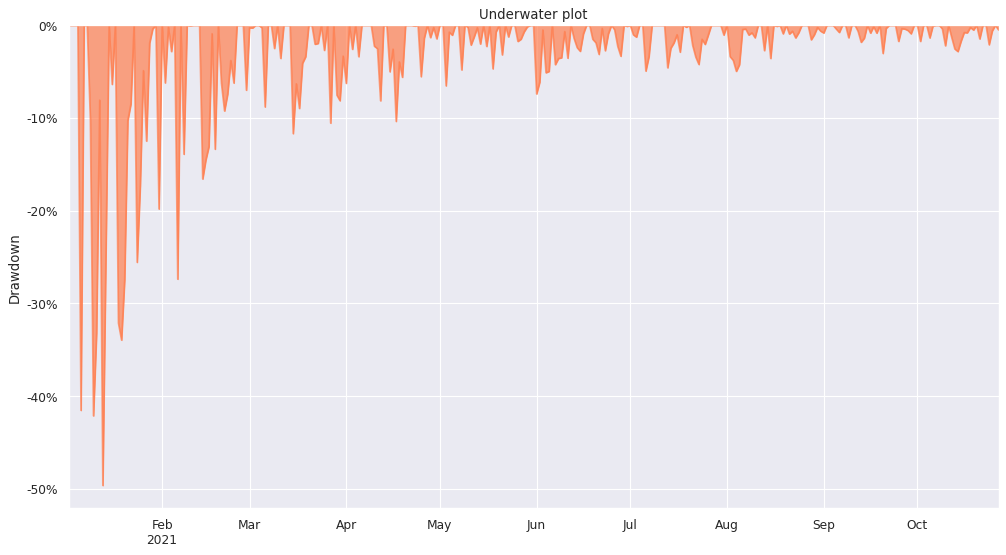

In [44]:
plt.figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
pyfolio.plot_drawdown_underwater(empyrical.simple_returns(ldf.y), ax=ax)

In [45]:
def generate_returns(lds, name=None, benchmark=None):
    lds.index = pd.Series(lds.index).astype('datetime64[ns]').dt.date.astype('datetime64[ns]')
    if name is None:
        name = lds.name
    lds.name = name

    benchmark_returns = None
    if benchmark is not None:
        benchmark = pd.Series(benchmark)
        benchmark.index = pd.Series(benchmark.index).astype('datetime64[ns]').dt.date.astype('datetime64[ns]')
        ldf = benchmark.to_frame()
        ldf['dummy'] = lds
        # in case if there are return dates of lds but not of benchmark we will forward fill the missing benchmark dates
        benchmark = benchmark.loc[lds.index[0]:lds.index[-1]]
        benchmark = benchmark.ffill()
        # in case that there are still some NaNs left fill them backward:
        benchmark = benchmark.bfill()
        benchmark_returns = empyrical.simple_returns(benchmark)

        ldf = benchmark.to_frame()
        ldf[lds.name] = lds
        lds = ldf[lds.name].interpolate(method='time').bfill()

    returns = empyrical.simple_returns(lds)
    returns.name = name

    return returns, benchmark_returns


def generate_stats(lds, name=None, benchmark=None):
    returns, benchmark_returns = generate_returns(lds, name=name, benchmark=benchmark)
    name = returns.name

    header_rows_df = pd.DataFrame(columns=[name])
    header_rows_df.loc['Start date'] = pd.to_datetime(returns.index[0].date(), utc=False)
    header_rows_df.loc['End date'] = pd.to_datetime(returns.index[-1].date(), utc=False)
    header_rows_df.loc['Total months'] = int(len(returns) / pyfolio.utils.APPROX_BDAYS_PER_MONTH)

    perf_stats_all = pyfolio.timeseries.perf_stats(returns, factor_returns=benchmark_returns).round(4)
    perf_stats_all.name = name
    return pd.concat([header_rows_df, perf_stats_all.to_frame()])

In [46]:
empyrical.periods.ANNUALIZATION_FACTORS[empyrical.periods.DAILY]

In [47]:
pyfolio.utils.APPROX_BDAYS_PER_MONTH

In [48]:
generate_stats(ldf.y)

/home/local/cs/local/install/anaconda3-2021.05-Linux-x86_64/envs/py38ds/lib/python3.8/site-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


,y
Start date,2021-01-02 00:00:00
End date,2021-10-27 00:00:00
Total months,14
Annual return,73.9759
Cumulative returns,166.7295
Annual volatility,4.1185
Sharpe ratio,0.8717
Calmar ratio,45.9123
Stability,NaN
Max drawdown,-1.6112


In [49]:
ldf.y.iloc[-1]/ldf.y.iloc[0]

In [50]:
# the annualized return is less than the cumulative return, because the data is not real trading data that would only be available on week-days, but not week-ends.
np.power(ldf.y.iloc[-1]/ldf.y.iloc[0], empyrical.periods.ANNUALIZATION_FACTORS[empyrical.periods.DAILY]/len(ldf))